# Breast Cancer Diagnosis Using Support Vector Machine (SVM)

We will build a binary classification model to detect breast cancer using the Support Vector Machine (SVM) algorithm. The dataset we use contains real-world medical features extracted from breast tissue samples. The target is to classify tumors as either benign or malignant.

To demonstrate the effectiveness of model tuning, we will first train a **basic, untuned SVM model**, and then iteratively improve it using preprocessing and hyperparameter tuning.


Saving new_Dataset.csv to new_Dataset.csv
Dataset shape: (1707, 32)
Columns: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


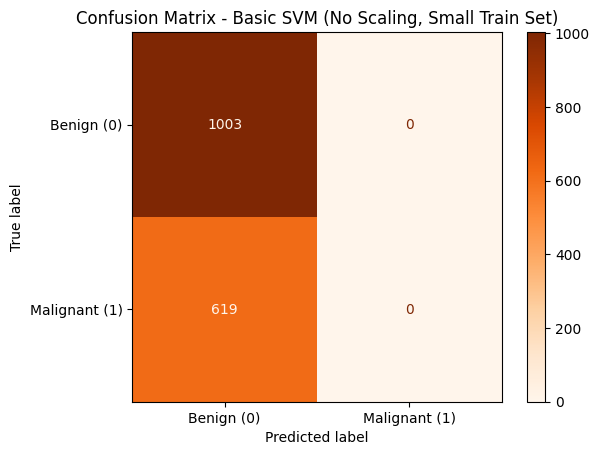

📋 Classification Metrics Summary:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
0,0.620000,1.000000,0.760000,1003.000000
1,0.000000,0.000000,0.000000,619.000000
accuracy,0.620000,0.620000,0.620000,0.620000
macro avg,0.310000,0.500000,0.380000,1622.000000
weighted avg,0.380000,0.620000,0.470000,1622.000000


In [2]:
# Basic Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Load Data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('new_Dataset.csv')

# Fix: Drop the 100% NaN column BEFORE calling dropna
df.drop(columns=['Unnamed: 32'], inplace=True, errors='ignore')

# Safe label conversion
if df['diagnosis'].dtype == object:
    df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Now drop rows with actual missing values (if any)
df.dropna(inplace=True)

# Confirm data shape
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())

# Use uncleaned features (including ID) to simulate poor setup
X = df.drop(columns=['diagnosis'], errors='ignore')
y = df['diagnosis']

# Use a small portion for training to simulate poor generalization
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.05, test_size=0.95, random_state=1)

# Train basic SVM without tuning or scaling
model = SVC()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign (0)', 'Malignant (1)'])
disp.plot(cmap='Oranges')
plt.title('Confusion Matrix - Basic SVM (No Scaling, Small Train Set)')
plt.grid(False)
plt.show()

# Classification Report as Table
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df = report_df[['precision', 'recall', 'f1-score', 'support']].round(2)

# Show Metrics
print("📋 Classification Metrics Summary:")
display(report_df.style.set_caption("Basic SVM Performance").background_gradient(cmap='YlOrRd'))


Saving new_Dataset.csv to new_Dataset (1).csv


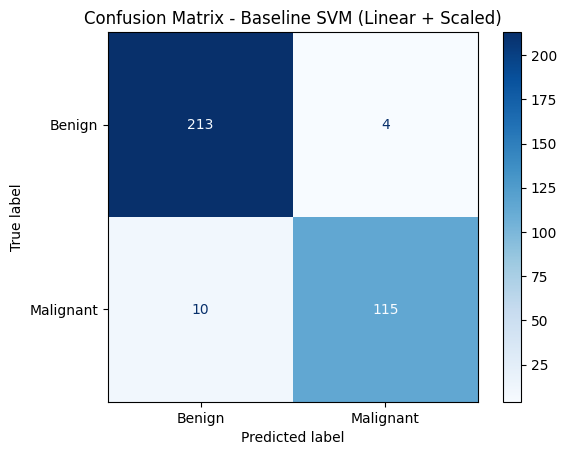

📋 Classification Metrics:


,precision,recall,f1-score,support
0,0.960000,0.980000,0.970000,217.000000
1,0.970000,0.920000,0.940000,125.000000
accuracy,0.960000,0.960000,0.960000,0.960000
macro avg,0.960000,0.950000,0.960000,342.000000
weighted avg,0.960000,0.960000,0.960000,342.000000


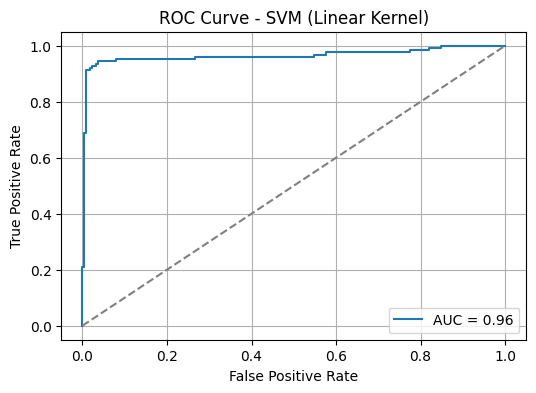

In [4]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay

# Upload CSV
uploaded = files.upload()

# Load dataset
df = pd.read_csv('new_Dataset.csv')

# Drop unnecessary column
df.drop(columns=['id', 'Unnamed: 32'], inplace=True, errors='ignore')

# Convert diagnosis to 0/1
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Check and drop any remaining NaNs (just in case)
df.dropna(inplace=True)

# Split features and labels
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train initial SVM model (intentionally simple)
model = SVC(kernel='linear', probability=True)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Baseline SVM (Linear + Scaled)')
plt.grid(False)
plt.show()

# Classification Report as DataFrame
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df = report_df[['precision', 'recall', 'f1-score', 'support']].round(2)

# Display styled table
print("📋 Classification Metrics:")
display(report_df.style.set_caption("Linear SVM Performance").background_gradient(cmap='PuBu'))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve - SVM (Linear Kernel)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


GridSearchCV with SVM Kernels

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Score: 0.9729

Test Set Evaluation:


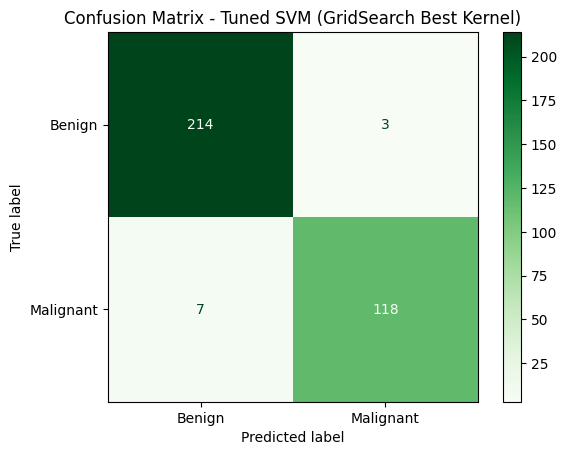

📋 Classification Metrics - Tuned SVM:


,precision,recall,f1-score,support
0,0.970000,0.990000,0.980000,217.000000
1,0.980000,0.940000,0.960000,125.000000
accuracy,0.970000,0.970000,0.970000,0.970000
macro avg,0.970000,0.970000,0.970000,342.000000
weighted avg,0.970000,0.970000,0.970000,342.000000


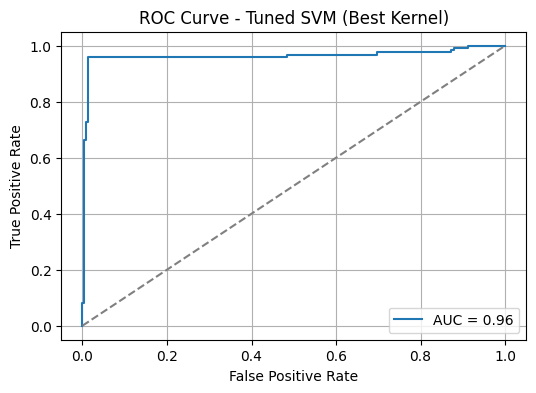

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],               # Regularization strength
    'gamma': ['scale', 'auto', 0.01, 0.001],  # Kernel coefficient (for rbf, poly, sigmoid)
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']  # Kernels to try
}

# Initialize base model
svc = SVC(probability=True)

# Grid search
grid = GridSearchCV(svc, param_grid, cv=5, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

# Best params and score
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score: {:.4f}".format(grid.best_score_))

# Final evaluation on test set
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
y_probs_best = best_model.predict_proba(X_test)[:, 1]  # Get probabilities for ROC


print("\nTest Set Evaluation:")

# Confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=['Benign', 'Malignant'])
disp.plot(cmap='Greens')
plt.title('Confusion Matrix - Tuned SVM (GridSearch Best Kernel)')
plt.grid(False)
plt.show()

# Styled classification report
report_best = classification_report(y_test, y_pred_best, output_dict=True)
report_df_best = pd.DataFrame(report_best).transpose()
report_df_best = report_df_best[['precision', 'recall', 'f1-score', 'support']].round(2)

print("📋 Classification Metrics - Tuned SVM:")
display(report_df_best.style.set_caption("Tuned SVM (GridSearchCV) Performance").background_gradient(cmap='Greens'))

# ROC curve
fpr_best, tpr_best, _ = roc_curve(y_test, y_probs_best)  # Calculate fpr, tpr for best model
auc_best = roc_auc_score(y_test, y_probs_best)  # Calculate AUC for best model

plt.figure(figsize=(6, 4))
plt.plot(fpr_best, tpr_best, label=f'AUC = {auc_best:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve - Tuned SVM (Best Kernel)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

10-Fold Cross-Validation for Best Model

Cross-Validation Accuracies: [0.9708 0.9649 0.9649 0.9883 0.9825 0.9766 0.9766 0.9706 0.9647 0.9882]
Mean Accuracy: 0.9748
Standard Deviation: 0.0087


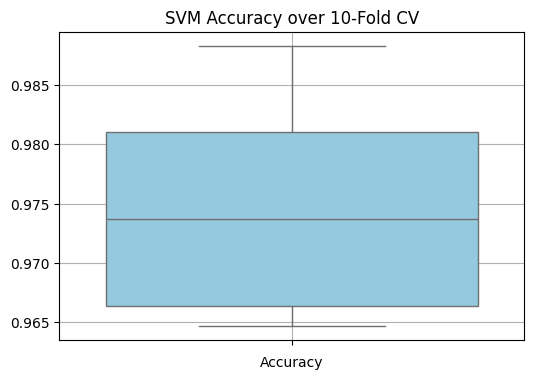

In [6]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Use the best model from GridSearch
best_svm = grid.best_estimator_

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform CV
cv_scores = cross_val_score(best_svm, X_scaled, y, cv=skf, scoring='accuracy')

# Results
print("Cross-Validation Accuracies:", np.round(cv_scores, 4))
print("Mean Accuracy:", round(cv_scores.mean(), 4))
print("Standard Deviation:", round(cv_scores.std(), 4))

plt.figure(figsize=(6,4))
sns.boxplot(cv_scores, color="skyblue")
plt.title("SVM Accuracy over 10-Fold CV")
plt.xlabel("Accuracy")
plt.grid(True)
plt.show()


### SelectKBest Feature Selection

Top 10 Selected Features:
 ['radius_mean' 'perimeter_mean' 'area_mean' 'concavity_mean'
 'concave points_mean' 'radius_worst' 'perimeter_worst' 'area_worst'
 'concavity_worst' 'concave points_worst']
radius_mean: 1546.02
perimeter_mean: 1686.31
area_mean: 1506.20
concavity_mean: 1260.00
concave points_mean: 2036.97
radius_worst: 2067.74
perimeter_worst: 2085.17
area_worst: 1700.27
concavity_worst: 1088.10
concave points_worst: 2332.19


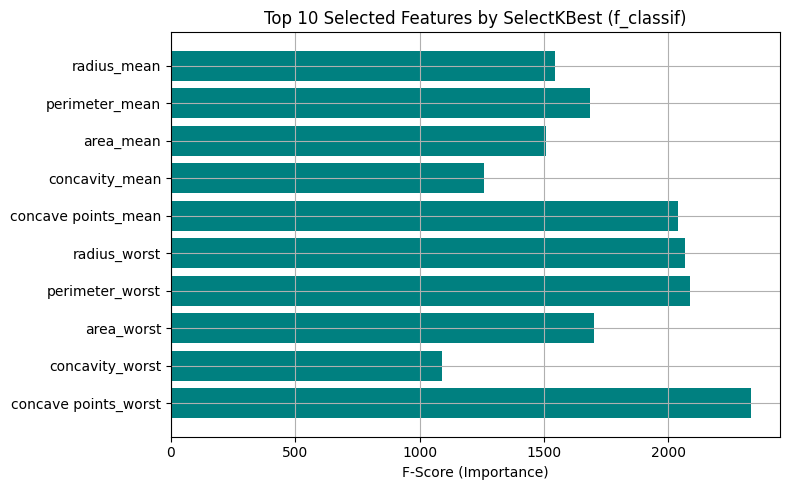

In [7]:
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

# Apply SelectKBest
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X_scaled, y)

# Get selected feature names
mask = selector.get_support()
selected_features = np.array(df.drop('diagnosis', axis=1).columns)[mask]
print("Top 10 Selected Features:\n", selected_features)

# Optional: show feature scores
scores = selector.scores_[mask]
for name, score in zip(selected_features, scores):
    print(f"{name}: {score:.2f}")

plt.figure(figsize=(8, 5))
plt.barh(selected_features, scores, color='teal')
plt.xlabel("F-Score (Importance)")
plt.title("Top 10 Selected Features by SelectKBest (f_classif)")
plt.gca().invert_yaxis()  # Highest at top
plt.grid(True)
plt.tight_layout()
plt.show()

### Train + Evaluate on Selected Features

<ipython-input-8-4faf953830bd>:34: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


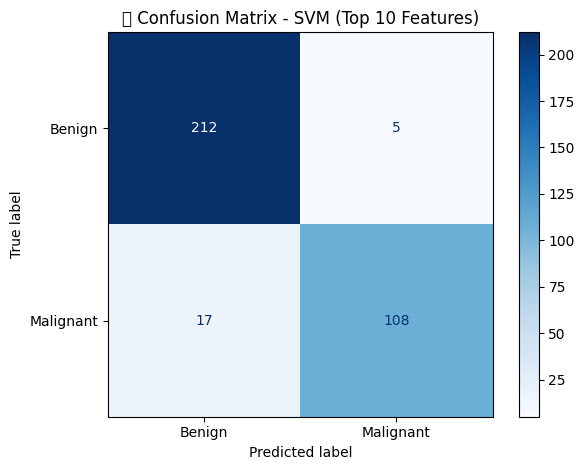

📋 Classification Report (Top 10 Features):


,precision,recall,f1-score,support
0,0.93,0.98,0.95,217
1,0.96,0.86,0.91,125
accuracy,0.94,0.94,0.94,1
macro avg,0.94,0.92,0.93,342
weighted avg,0.94,0.94,0.93,342


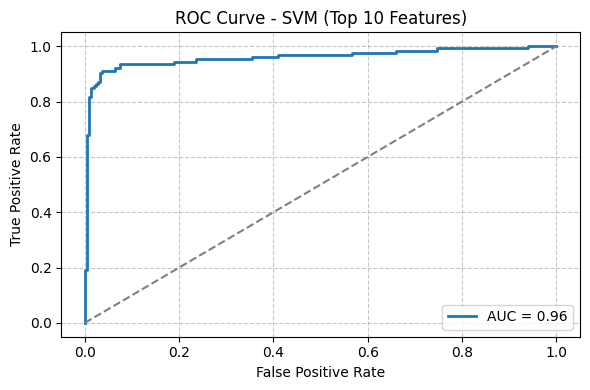

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reuse the selected features from SelectKBest
X_selected_named = df[selected_features]  # use unscaled version with feature names

# Standardize again (fit only on selected features)
scaler_sel = StandardScaler()
X_sel_scaled = scaler_sel.fit_transform(X_selected_named)

# Split the data
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_sel_scaled, y, test_size=0.2, random_state=42)

# Train SVM using best parameters from earlier
model_sel = SVC(kernel='linear', C=0.1, gamma='scale', probability=True)
model_sel.fit(X_train_sel, y_train_sel)

# Evaluate
y_pred_sel = model_sel.predict(X_test_sel)

# ROC Curve
y_probs_sel = model_sel.predict_proba(X_test_sel)[:, 1]
fpr_sel, tpr_sel, _ = roc_curve(y_test_sel, y_probs_sel)
auc_sel = roc_auc_score(y_test_sel, y_probs_sel)

 #--- Confusion Matrix (Styled) ---
cm = confusion_matrix(y_test_sel, y_pred_sel)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
disp.plot(cmap='Blues', colorbar=True, values_format='d')
plt.title('📊 Confusion Matrix - SVM (Top 10 Features)')
plt.grid(False)
plt.tight_layout()
plt.show()

# --- Classification Report as Styled Table ---
report = classification_report(y_test_sel, y_pred_sel, output_dict=True)
report_df = pd.DataFrame(report).transpose()[['precision', 'recall', 'f1-score', 'support']].round(2)

# Display nicely
print("📋 Classification Report (Top 10 Features):")
display(report_df.style.set_caption("SVM Performance with Top 10 Features")
        .background_gradient(cmap='Blues')
        .format({"precision": "{:.2f}", "recall": "{:.2f}", "f1-score": "{:.2f}", "support": "{:.0f}"}))

# --- ROC Curve ---
plt.figure(figsize=(6, 4))
plt.plot(fpr_sel, tpr_sel, linewidth=2, label=f"AUC = {auc_sel:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve - SVM (Top 10 Features)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


### Inject Gaussian Noise into 20% of Samples

Add random noise to a portion of the dataset

Retrain the model and observe performance impact

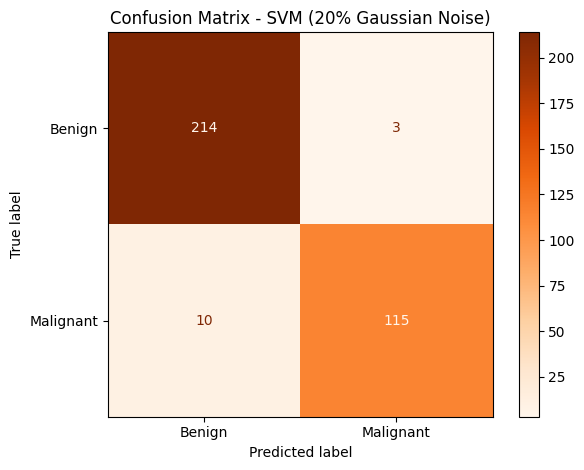

📋 Classification Metrics - Gaussian Noise:


,precision,recall,f1-score,support
0,0.96,0.99,0.97,217
1,0.97,0.92,0.95,125
accuracy,0.96,0.96,0.96,1
macro avg,0.96,0.95,0.96,342
weighted avg,0.96,0.96,0.96,342


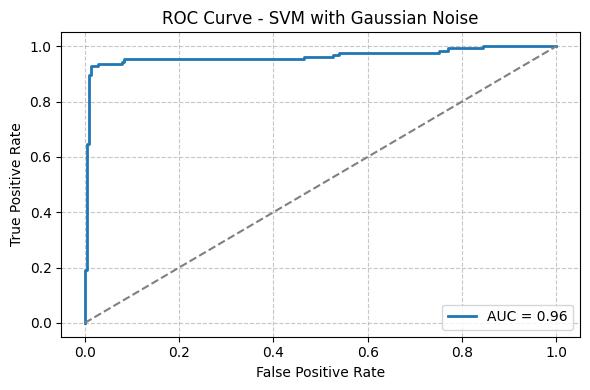

In [9]:
import copy
from sklearn.metrics import ConfusionMatrixDisplay


# Work on a copy of the original full-featured dataset
X_noisy = copy.deepcopy(X_scaled)

# Inject noise into 20% of rows
np.random.seed(42)
num_samples = int(0.2 * X_noisy.shape[0])
noise_indices = np.random.choice(X_noisy.shape[0], size=num_samples, replace=False)

# Gaussian noise: mean 0, std deviation 0.1
noise = np.random.normal(loc=0.0, scale=0.1, size=X_noisy[noise_indices].shape)

# Apply noise
X_noisy[noise_indices] += noise

# Split noisy dataset
X_train_noisy, X_test_noisy, y_train_noisy, y_test_noisy = train_test_split(X_noisy, y, test_size=0.2, random_state=42)

# Train model on noisy data
model_noisy = SVC(kernel='linear', C=0.1, gamma='scale', probability=True)
model_noisy.fit(X_train_noisy, y_train_noisy)

# Evaluate
y_pred_noisy = model_noisy.predict(X_test_noisy)
cm_noisy = confusion_matrix(y_test_noisy, y_pred_noisy)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_noisy, display_labels=["Benign", "Malignant"])
disp.plot(cmap='Oranges', values_format='d')
plt.title("Confusion Matrix - SVM (20% Gaussian Noise)")
plt.grid(False)
plt.tight_layout()
plt.show()

# ROC Curve
y_probs_noisy = model_noisy.predict_proba(X_test_noisy)[:, 1]
fpr_noisy, tpr_noisy, _ = roc_curve(y_test_noisy, y_probs_noisy)
auc_noisy = roc_auc_score(y_test_noisy, y_probs_noisy)

report_noisy = classification_report(y_test_noisy, y_pred_noisy, output_dict=True)
report_df_noisy = pd.DataFrame(report_noisy).transpose()
report_df_noisy = report_df_noisy[['precision', 'recall', 'f1-score', 'support']].round(2)

print("📋 Classification Metrics - Gaussian Noise:")
display(report_df_noisy.style.set_caption("SVM Performance with 20% Gaussian Noise")
       .background_gradient(cmap='Oranges')
       .format({"precision": "{:.2f}", "recall": "{:.2f}", "f1-score": "{:.2f}", "support": "{:.0f}"}))

plt.figure(figsize=(6, 4))
plt.plot(fpr_noisy, tpr_noisy, label=f"AUC = {auc_noisy:.2f}", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve - SVM with Gaussian Noise")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


## One-Class SVM (Anomaly Detection)

This will simulate a scenario where the model:

* Learns only from benign (normal) samples

* Then flags malignant cases as anomalies

* Useful in early-stage detection where you only have clean baseline data

Simulation Setup:
* Use only benign (label = 0) samples for training

* Combine both benign + malignant for testing

* See how well the model flags malignant cases as “abnormal”



Confusion Matrix (One-Class SVM):
 [[997  61]
 [163 486]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1058
           1       0.89      0.75      0.81       649

    accuracy                           0.87      1707
   macro avg       0.87      0.85      0.86      1707
weighted avg       0.87      0.87      0.87      1707



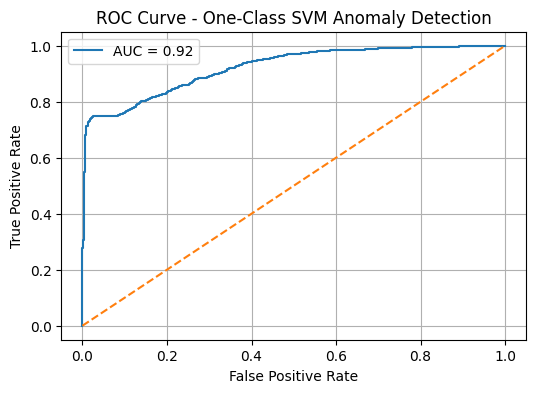

In [10]:
from sklearn.svm import OneClassSVM

# Step 1: Filter benign samples (label 0) for training
X_benign = X_scaled[y == 0]

# Step 2: Use full dataset for testing
X_test_full = X_scaled
y_test_full = y

# Step 3: Train One-Class SVM
oc_model = OneClassSVM(kernel='rbf', nu=0.05, gamma='scale')  # nu: expected outlier rate
oc_model.fit(X_benign)

# Step 4: Predict
# One-Class SVM outputs: +1 for inliers (benign), -1 for outliers (anomalies/malignant)
y_oc_pred = oc_model.predict(X_test_full)
y_oc_pred = np.where(y_oc_pred == 1, 0, 1)  # Convert to binary: 1 = predicted malignant

# Step 5: Evaluate
print("Confusion Matrix (One-Class SVM):\n", confusion_matrix(y_test_full, y_oc_pred))
print("\nClassification Report:\n", classification_report(y_test_full, y_oc_pred))

# ROC Curve
from sklearn.metrics import roc_auc_score, roc_curve

# Score decision function for ROC
oc_scores = -oc_model.decision_function(X_test_full)
fpr_oc, tpr_oc, _ = roc_curve(y_test_full, oc_scores)
auc_oc = roc_auc_score(y_test_full, oc_scores)

plt.figure(figsize=(6, 4))
plt.plot(fpr_oc, tpr_oc, label=f'AUC = {auc_oc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve - One-Class SVM Anomaly Detection')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


## Synthetic Class Imbalance + Noise Injection

Simulate class imbalance

* Downsample benign cases to create a 70:30 malignant:benign imbalance

* This flips the usual balance and stresses the model

Inject Gaussian noise

* On top of the imbalanced data, we’ll inject heavier noise (std = 0.3)

Retrain and evaluate the same SVM model

* Track changes in accuracy, AUC, F1 — especially how well it handles the minority class (benign)

Confusion Matrix:
 [[ 38   9]
 [  8 114]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82        47
           1       0.93      0.93      0.93       122

    accuracy                           0.90       169
   macro avg       0.88      0.87      0.87       169
weighted avg       0.90      0.90      0.90       169



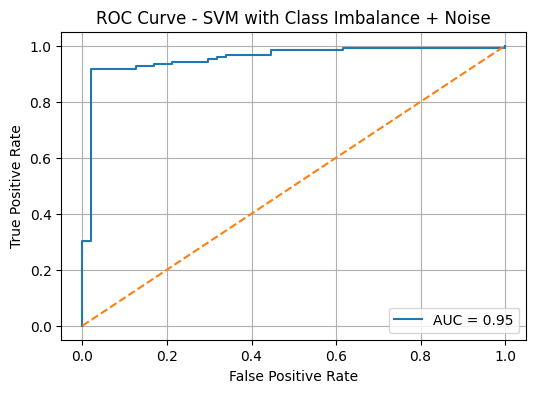

In [11]:
from sklearn.utils import resample

# Step 1: Separate classes
X_benign = X_scaled[y == 0]
y_benign = y[y == 0]
X_malignant = X_scaled[y == 1]
y_malignant = y[y == 1]

# Step 2: Downsample benign to 30% of malignant size
n_malignant = len(y_malignant)
n_benign_downsampled = int(n_malignant * 0.3)

X_benign_down, y_benign_down = resample(
    X_benign, y_benign,
    replace=False,
    n_samples=n_benign_downsampled,
    random_state=42
)

# Step 3: Combine to create new imbalanced dataset
X_imbalanced = np.vstack((X_malignant, X_benign_down))
y_imbalanced = np.hstack((y_malignant, y_benign_down))

# Step 4: Inject heavier noise (mean=0, std=0.3)
np.random.seed(42)
noise = np.random.normal(loc=0.0, scale=0.3, size=X_imbalanced.shape)
X_noisy_imbalanced = X_imbalanced + noise

# Step 5: Train/test split
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X_noisy_imbalanced, y_imbalanced, test_size=0.2, random_state=42)

# Step 6: Train SVM on the corrupted imbalanced dataset
model_imb = SVC(kernel='linear', C=0.1, gamma='scale', probability=True)
model_imb.fit(X_train_imb, y_train_imb)

# Step 7: Evaluation
y_pred_imb = model_imb.predict(X_test_imb)
print("Confusion Matrix:\n", confusion_matrix(y_test_imb, y_pred_imb))
print("\nClassification Report:\n", classification_report(y_test_imb, y_pred_imb))

# Step 8: ROC Curve
y_probs_imb = model_imb.predict_proba(X_test_imb)[:, 1]
fpr_imb, tpr_imb, _ = roc_curve(y_test_imb, y_probs_imb)
auc_imb = roc_auc_score(y_test_imb, y_probs_imb)

plt.figure(figsize=(6, 4))
plt.plot(fpr_imb, tpr_imb, label=f'AUC = {auc_imb:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve - SVM with Class Imbalance + Noise')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()
